# Analysis of Titanic Data

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt

## Importation of Data 

Importation des données et separation pour meilleur analyse


In [ ]:

titanic = []
with open('titanic.csv', newline='') as csvfile: 
    reader = csv.DictReader(csvfile) #Première ligne avec le noms des variables 
    for i, row in enumerate(reader,start=1) :  # 1 pour ne pas prendre le header en compte 
        survived = int(row['Survived']) # 0 = No, 1 = Yes
        pclass = float(row['Pclass']) #	1 = 1st, 2 = 2nd, 3 = 3rd
        sex = 0 if row['Sex'] == 'female' else 1
        age = float(row['Age']) 
        sibsp = int(row['Siblings/Spouses Aboard']) #Siblings and spouses 
        parch = int(row['Parents/Children Aboard']) # Parents and children 
        fare = float(row['Fare'])
        titanic.append([survived,pclass,sex,age,sibsp,parch,fare]) 
titanic = np.array(titanic)
print(titanic.shape)
n,p = titanic.shape
#Affectation de chaque colonne à une variable pour mieux analyser
survie = titanic[:,0]
pclass = titanic[:,1]
sex = titanic[:,2]
age = titanic[:,3]
sibsp = titanic[:,4]
parch = titanic[:,5]
fare = titanic[:,6]
#Variables X d'étude 
X =  titanic[:,1:]
y = survie

(887, 7)


Description de la variable 'age'

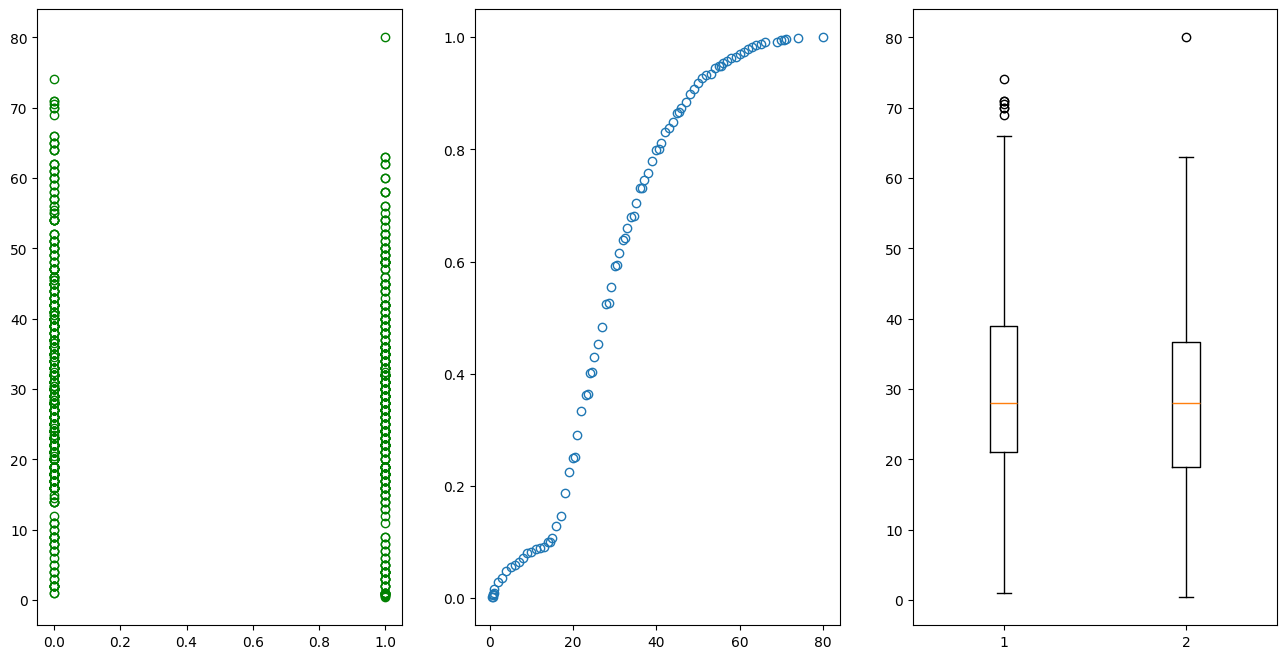

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1,3,1)
plt.plot(survie,age,'o',mfc = 'none',color = 'green') # La survie en focntion de l'age
mod_age,eff_age = np.unique(age,return_counts=True)
f_cum_age = np.cumsum(eff_age / np.sum(eff_age))
plt.subplot(1,3,2)
plt.plot(mod_age,f_cum_age,'o',mfc = 'none') #fonction empirique sur laquelle on voit qu''il y a un acroisement lent pour l'age entre 0 et 15
ages_morts = age[survie==0]
ages_vivant = age[survie==1]
plt.subplot(1,3,3)
plt.boxplot([ages_morts,ages_vivant]);

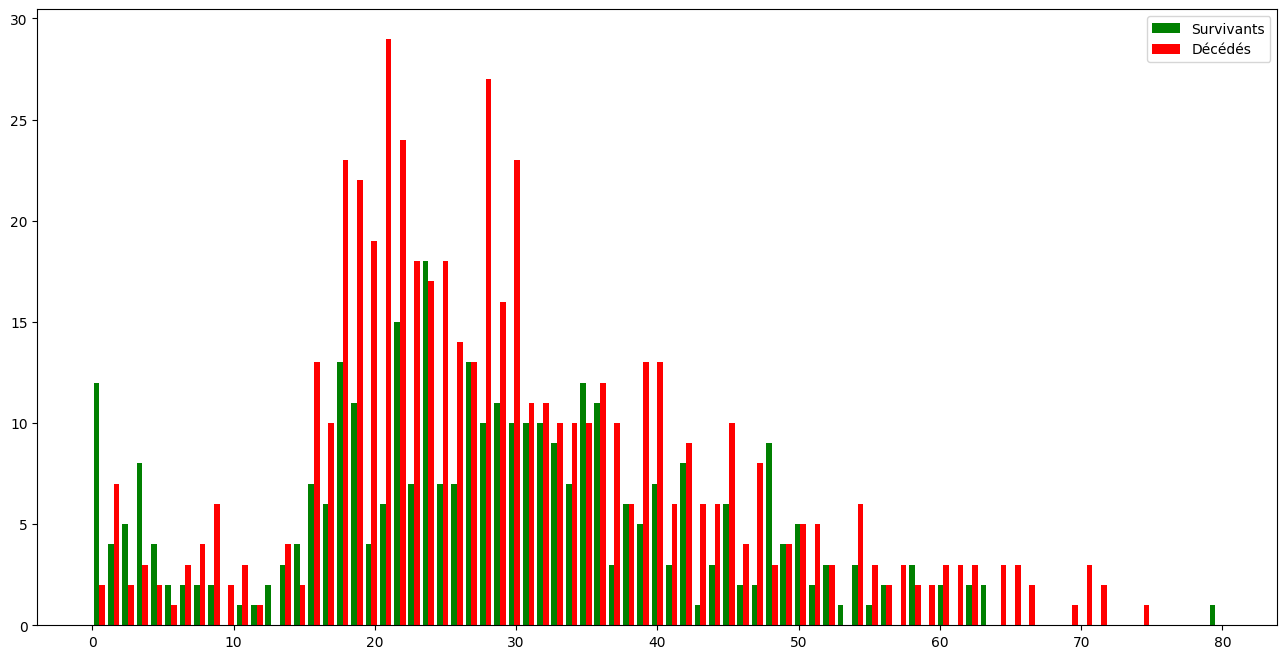

In [ ]:
bins = np.linspace(0, 80, 80)  #un bin pour chaque age
plt.figure(figsize=(16, 8))
plt.hist([ages_vivant,ages_morts], 
         bins=bins, 
         color=['green', 'red'],
         label=['Survivants','Décédés']);
plt.legend()

Description variable 'sex'

Rapport morts/vivants chez les hommes:  4.256880733944954
Rapport morts/vivants chez les femmes:  0.34763948497854075


<BarContainer object of 2 artists>

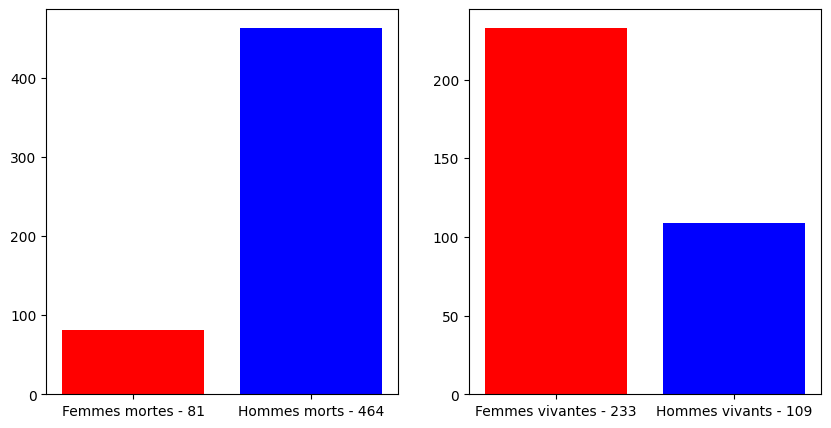

In [ ]:
femmes = sex == 0
hommes = sex == 1
vivants = survie == 1
morts = survie == 0
# Groupes
femmes_mortes = titanic[np.logical_and(femmes, morts)]
femmes_vivantes = titanic[np.logical_and(femmes,vivants)]
hommes_morts = titanic[np.logical_and(hommes,morts)]
hommes_vivants = titanic[np.logical_and(hommes,vivants)]

nb_femmes_mortes = len(femmes_mortes)
nb_hommes_morts = len(hommes_morts)
nb_femmes_vivantes = len(femmes_vivantes)
nb_hommes_vivants = len(hommes_vivants)

print('Rapport morts/vivants chez les hommes: ',nb_hommes_morts/nb_hommes_vivants)
print('Rapport morts/vivants chez les femmes: ',nb_femmes_mortes/nb_femmes_vivantes)

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.bar([f'Femmes mortes - {nb_femmes_mortes}', f'Hommes morts - {nb_hommes_morts}'], [nb_femmes_mortes, nb_hommes_morts], color=['red', 'blue'])
plt.subplot(1,2,2)
plt.bar([f'Femmes vivantes - {nb_femmes_vivantes}', f'Hommes vivants - {nb_hommes_vivants}'], [nb_femmes_vivantes, nb_hommes_vivants], color=['red', 'blue'])

Description variable 'pclass'

Rapport morts/vivants en premiere classe  0.5882352941176471
Rapport morts/vivants en deuxieme classe:  1.1149425287356323
Rapport morts/vivants en troisieme classe:  3.092436974789916


<BarContainer object of 3 artists>

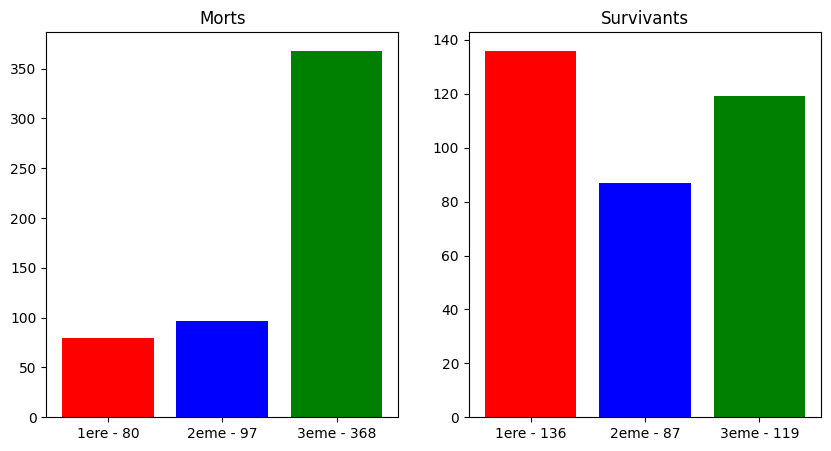

In [ ]:
premiere = pclass == 1
deuxieme = pclass == 2
troisieme = pclass == 3

morts_premiere = titanic[np.logical_and(premiere,morts)]
vivants_premiere = titanic[np.logical_and(premiere,vivants)]
morts_deuxieme = titanic[np.logical_and(deuxieme,morts)]
vivants_deuxieme = titanic[np.logical_and(deuxieme,vivants)]
morts_troisieme = titanic[np.logical_and(troisieme,morts)]
vivants_troisieme = titanic[np.logical_and(troisieme,vivants)]

nb_premiere_morts = len(morts_premiere)
nb_deuxieme_morts = len(morts_deuxieme)
nb_troisieme_morts = len(morts_troisieme)
nb_premiere_vivants = len(vivants_premiere)
nb_deuxieme_vivants = len(vivants_deuxieme)
nb_troisieme_vivants = len(vivants_troisieme)

print('Rapport morts/vivants en premiere classe ',nb_premiere_morts/nb_premiere_vivants)
print('Rapport morts/vivants en deuxieme classe: ',nb_deuxieme_morts/nb_deuxieme_vivants)
print('Rapport morts/vivants en troisieme classe: ',nb_troisieme_morts/nb_troisieme_vivants)

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.title('Morts')
plt.bar([f'1ere - {nb_premiere_morts}', f'2eme - {nb_deuxieme_morts}', f'3eme - {nb_troisieme_morts}'], [nb_premiere_morts, nb_deuxieme_morts,nb_troisieme_morts], color=['red', 'blue','green'])
plt.subplot(1,2,2)
plt.title('Survivants')
plt.bar([f'1ere - {nb_premiere_vivants}', f'2eme - {nb_deuxieme_vivants}', f'3eme - {nb_troisieme_vivants}'], [nb_premiere_vivants, nb_deuxieme_vivants,nb_troisieme_vivants], color=['red', 'blue','green'])

Etude des variables sibsp et parch

Pourcentage pour 0.0 parch:  34.57  %
Pourcentage pour 1.0 parch:  55.08  %
Pourcentage pour 2.0 parch:  50.0  %
Pourcentage pour 3.0 parch:  60.0  %
Pourcentage pour 4.0 parch:  0.0  %
Pourcentage pour 5.0 parch:  20.0  %
Pourcentage pour 6.0 parch:  0.0  %


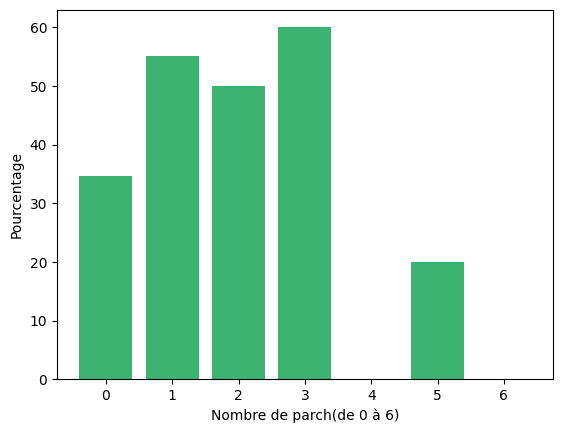

In [ ]:
#Ici on représente le taux de survie des passagers en fonction du nombre du nombre de leurs parents ou enfants à bord
mod_parch = np.unique(parch)
taux_survie_par_parch = {}

for mod in mod_parch:
    total_mod = titanic[parch == mod]
    survivants_mod = titanic[np.logical_and(parch == mod, vivants)]
    taux = len(survivants_mod) / len(total_mod) * 100
    taux_survie_par_parch[mod] = taux
    print('Pourcentage pour' ,mod, 'parch: ',round(taux_survie_par_parch[mod],2), ' %')
 
plt.bar(mod_parch, taux_survie_par_parch.values(), color='mediumseagreen')
plt.ylabel('Pourcentage')
plt.xlabel('Nombre de parch(de 0 à 6)')
plt.xticks(np.arange(7));
# on voit par exemple que lorsqu'un passager a 3 enfants et parents au total son chance de survie est de 60%

Pourcentage pour 0.0 sibsp:  34.77  %
Pourcentage pour 1.0 sibsp:  53.59  %
Pourcentage pour 2.0 sibsp:  46.43  %
Pourcentage pour 3.0 sibsp:  25.0  %
Pourcentage pour 4.0 sibsp:  16.67  %
Pourcentage pour 5.0 sibsp:  0.0  %
Pourcentage pour 8.0 sibsp:  0.0  %


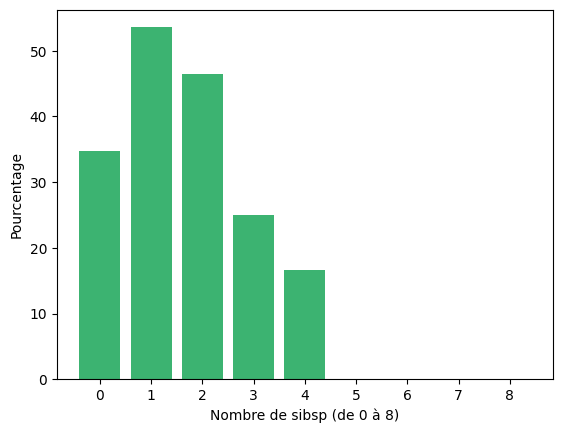

In [ ]:
# Ici on représente le taux de survie des passagers en fonction du nombre du nombre de leurs frères, soeurs ou époux à bord
mod_sibsp = np.unique(sibsp)
taux_survie_par_sibsp = {}

for mod in mod_sibsp:
    total_mod = titanic[sibsp == mod]
    survivants_mod = titanic[np.logical_and(sibsp == mod, vivants)]
    taux = len(survivants_mod) / len(total_mod) * 100
    taux_survie_par_sibsp[mod] = taux
    print('Pourcentage pour' ,mod, 'sibsp: ',round(taux_survie_par_sibsp[mod],2),' %')


plt.bar(mod_sibsp, taux_survie_par_sibsp.values(), color='mediumseagreen')
plt.ylabel('Pourcentage')
plt.xlabel('Nombre de sibsp (de 0 à 8)')
plt.xticks(np.arange(9)); 

# on voit par exemple que lorsqu'un passager a 1 époux, frère ou soeur au total son chance de survie est de 60%

On voit que les familles de petite taille ont statistiquement plus de chance pour survivre

Description de la variable 'fare'

512.3292


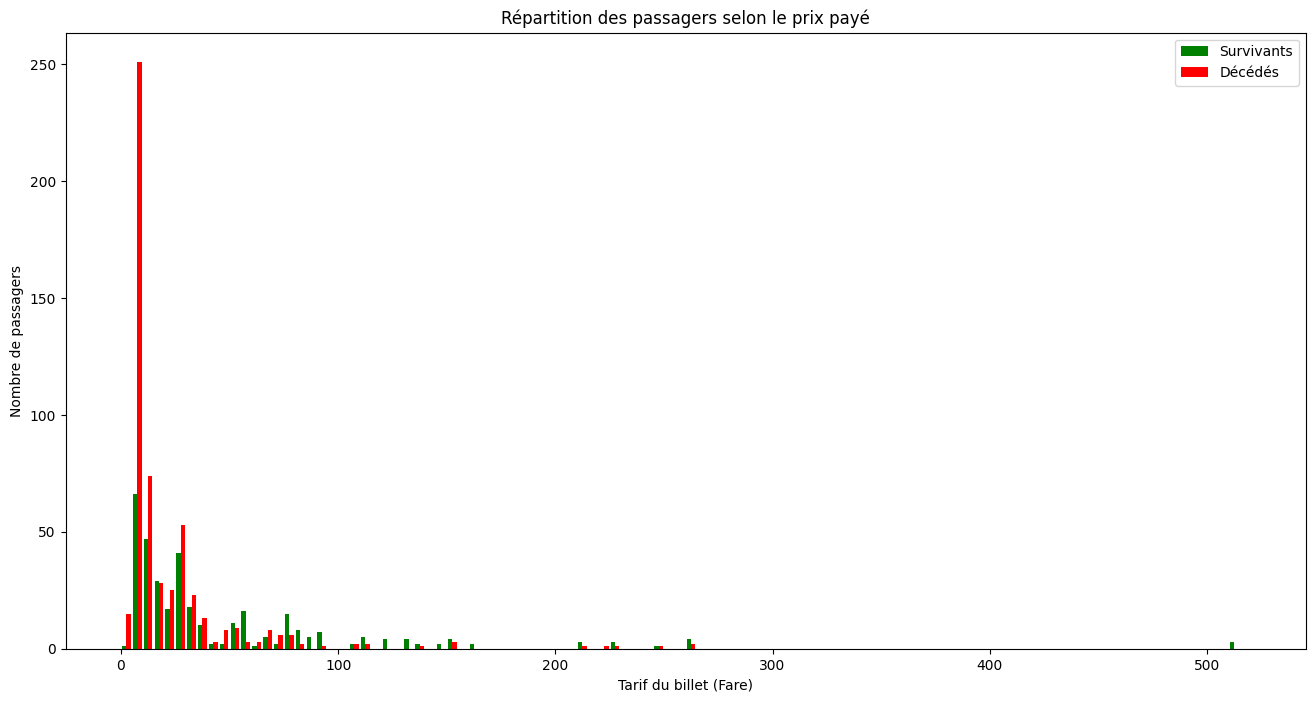

In [ ]:
# Choisir les tranches de prix
bins = np.arange(0, np.max(fare)+10, 5)  # par tranches de 20
print(np.max(fare))
# Histogramme groupé pour morts et survivants
plt.figure(figsize=(16, 8))
plt.hist([fare[vivants], fare[morts]],
         bins=bins,
         color=['green', 'red'],
         label=['Survivants', 'Décédés'])

plt.xlabel("Tarif du billet (Fare)")
plt.ylabel("Nombre de passagers")
plt.title("Répartition des passagers selon le prix payé")
plt.legend()


Objectif renier ou non ces hypothèses : 

\begin{equation}
 \begin{cases}
    H_0 : \text{Taille de la famille dépendant avec survie}\\
    H_1 : \text{Taille de la famille indépendant avec survie}
  \end{cases}
\end{equation}

Loi du $chi2$

## Tableau de contingence
$$
\begin{array}{|c||c|}
\hline
                 & Survie = 0 & survie = 1 \\
 \hline \hline
 tailleFamille = 0 & ... &  ...  \\
 \hline
 tailleFamille = 1 &  ...  &  ... \\
 \hline
    tailleFamille = 2 &  ...  &... \\
\hline
tailleFamille = ... & ...  & ...\\
 \hline
 

\end{array}
$$

In [ ]:
# print(sibsp.shape)
# print(parch.shape)

#Création du groupe famille 
tailleFamille = 1+sibsp +parch

#Affichage des différentes tailles de familles
modalite, effectif = np.unique(tailleFamille ,return_counts=True)
# print(modalite)

#Initilisation du tableau de contingence 
tab_cont_famille = np.zeros((len(modalite),2))

#Remplissage du tableau de contingence 
print('Tableau de contingence initiale: ')
for s in range(2):
    for f in range(len(modalite)) :
        tab_cont_famille[f,s] = np.sum(np.logical_and((tailleFamille == modalite[f]),(survie == s) ))

print(tab_cont_famille)
#Pour veiller à un bon test du chi2 (effectif >5 pour chaques éléments du tableau)
taille_reduit = len(modalite)-4
tab_cont_famille_2 = np.zeros((taille_reduit , 2))
print(tab_cont_famille_2.shape)


#Remplissage du tableau de contingence du test 
#Regroupement des modalités
print('Tableau de contingence test: ')
for s in range(2):
    for f in range(taille_reduit) :
        tab_cont_famille_2[f,s] = tab_cont_famille[f,s]/n

tab_cont_famille_2[taille_reduit-1,0] = (tab_cont_famille_2[taille_reduit-1,0] + np.sum(tab_cont_famille[taille_reduit:,0]))/n
tab_cont_famille_2[taille_reduit-1,1] = (tab_cont_famille_2[taille_reduit-1,1] + np.sum(tab_cont_famille[taille_reduit:,1]))/n

print(tab_cont_famille_2)


Tableau de contingence initiale: 
[[370. 163.]
 [ 72.  89.]
 [ 43.  59.]
 [  8.  21.]
 [ 12.   3.]
 [ 19.   3.]
 [  8.   4.]
 [  6.   0.]
 [  7.   0.]]
(5, 2)
Tableau de contingence test: 
[[0.41713641 0.1837655 ]
 [0.08117249 0.10033822]
 [0.04847802 0.06651635]
 [0.00901917 0.02367531]
 [0.04511108 0.00789558]]


In [ ]:

marg_l = np.sum(tab_cont_famille_2 , axis=1)
marg_c = np.sum(tab_cont_famille_2 , axis=0)
# marg_l,marg_c

#Creation d'un tableau sous hypothèse d'indépendance
print('')
print('Tableau indépendant :' ) 
tab_th_famille = np.outer(marg_c,marg_l).T
print(tab_th_famille
      )
#Calcul du chi2
chi_2 = np.sum((tab_cont_famille_2 - tab_th_famille)**2/(tab_th_famille))
print('chi2')
print(chi_2)

#Vérification de la valeur du chi2
from scipy.stats import chi2_contingency 

chi2_check, pvaleur, ddl, tab_th_check = chi2_contingency(tab_cont_famille_2)
print(chi2_check) #Meme valeur bonne estimation du chi2

#p-valeur
print('p-valeur')
print(pvaleur)
print('ddl')
print(ddl)


Tableau indépendant :
[[0.36109228 0.22965928]
 [0.1090729  0.06937175]
 [0.06910209 0.04394981]
 [0.01964667 0.01249553]
 [0.03185261 0.02025867]]
chi2
0.0853866311865879
0.08366377583715019
p-valeur
0.9991490686734694
ddl
4


### Conclusion 

La p-valeur $0.9999998370124058 > 0.05$ nous indique qu'on ne peut pas rejeter 
$H_0$

Pas de preuve de dépendance

## ACP

(887, 6)


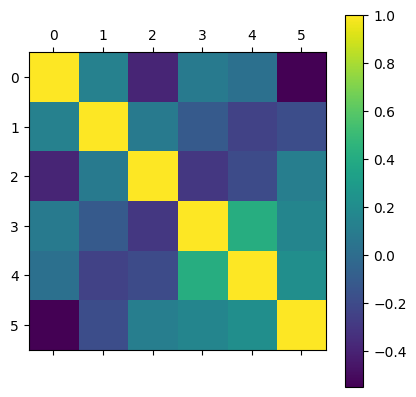

In [ ]:
print(X.shape)
Xc = X-np.mean(X,axis=0)
Xr = Xc/np.std(X,axis=0)

#Matrice de Correlation 
cov = (1/n) * (Xr.T@Xr)
plt.matshow(cov)
plt.colorbar()

In [ ]:
eigenvalues, eigenvectors = np.linalg.eigh(cov)
print(eigenvalues, eigenvectors)

print((eigenvalues/ np.sum(eigenvalues))*100)

[0.36141775 0.54311271 0.66873197 0.87321054 1.76103147 1.79249558] [[ 0.72148598 -0.04928199 -0.16041988  0.0717065  -0.58800443 -0.31686541]
 [-0.07918166 -0.24786822  0.02632747 -0.87632493  0.02707931 -0.40363325]
 [ 0.28823695  0.29119461 -0.70196194 -0.06361422  0.56950706 -0.10483096]
 [-0.0277079   0.70982104 -0.04229718 -0.41148836 -0.3668403   0.43554889]
 [-0.15195586 -0.54791431 -0.5770222  -0.09277694 -0.27029305  0.51193633]
 [ 0.60518542 -0.21744499  0.38220162 -0.21198066  0.34863889  0.52335966]]
[ 6.02362909  9.05187847 11.14553277 14.55350892 29.35052448 29.87492628]


In [ ]:
R22 = np.corrcoef(cov)[0,1]**2
print(R22)

0.04883169629443231


# Regression

# Fonction de régression


In [ ]:
#Foction reprise de la correction du TP
def ma_reg(X,y):
    '''
    X : numpy array de dimention n x p
    y : numpy array de dimention n
    '''
    n,p = X.shape
    m = np.prod(y.shape)
    if n != m:
        raise Exception('X doit etre une matrice de n lignes et p colonnes et y un vecteur de n lignes')
        
    a = np.linalg.solve(X.T@X,X.T@y)
    z = X@a
    e = y - z # z - y
    s2 = np.sum(e**2)/(n-p-1)
    SCT = np.sum((y-np.mean(y))**2)
    SCE = np.sum(e**2)
    R2 = 1 - SCE/SCT
    H = X@np.linalg.solve(X.T@X,X.T)  # plus stable et plus rapide
    h = np.diag(H)
    c = h/((1-h)**2)*(e**2)/(p*s2)
    
    dv = np.stack([e, h, c])
    
    return a, s2, R2, dv

X_reg = np.column_stack((np.ones((n,1)),X))
a, s2, R2, diagd = ma_reg(X_reg,y)
e = diagd[0,:]
h =diagd[1,:]
c =diagd[2,:]
R2

np.float64(0.39749298971397795)

array([[1.        , 0.59828797, 0.99882283, ..., 0.37379676, 0.78509996,
        0.99626991],
       [0.59828797, 1.        , 0.59188827, ..., 0.95972788, 0.9649774 ,
        0.5392983 ],
       [0.99882283, 0.59188827, 1.        , ..., 0.3690632 , 0.78015649,
        0.99696256],
       ...,
       [0.37379676, 0.95972788, 0.3690632 , ..., 1.        , 0.85798702,
        0.30484778],
       [0.78509996, 0.9649774 , 0.78015649, ..., 0.85798702, 1.        ,
        0.74008572],
       [0.99626991, 0.5392983 , 0.99696256, ..., 0.30484778, 0.74008572,
        1.        ]], shape=(887, 887))

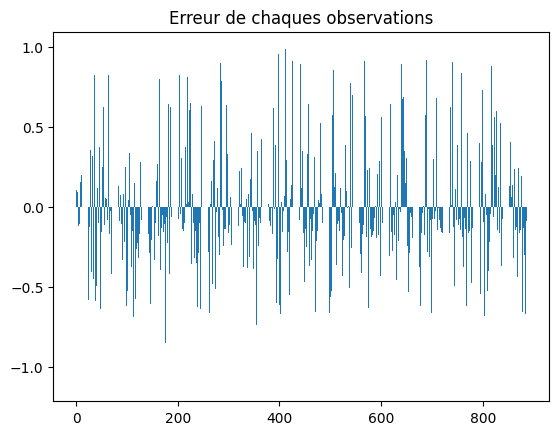

In [ ]:
plt.bar(range(n),e)
plt.title('Erreur de chaques observations')
np.corrcoef(X_reg)

## Levier de chaque observations

Text(0.5, 1.0, 'Effet levier de chaques observations')

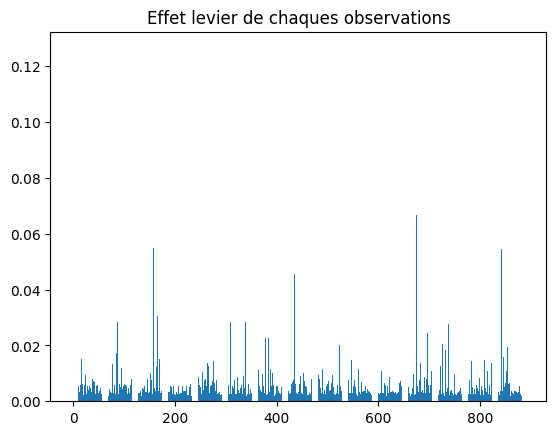

In [ ]:
plt.bar(range(n),h)
plt.title('Effet levier de chaques observations')

### Etude de la contribution

Text(0.5, 1.0, 'Etude de la contributions des observations ')

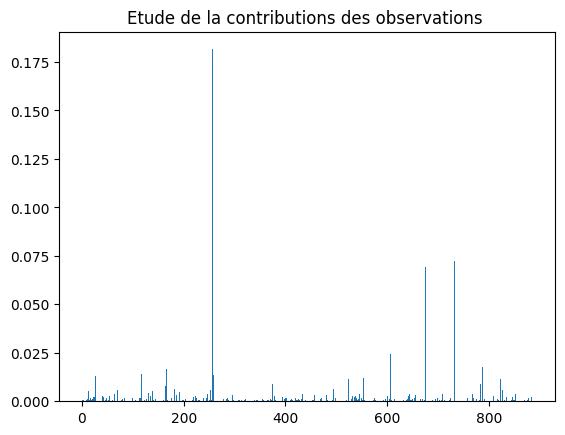

In [ ]:
plt.bar(range(n),c)
plt.title('Etude de la contributions des observations ')

Valeur sortant du lot 

In [ ]:
print(np.where(c == max(c)))
print(titanic[np.where(c == max(c),:])

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (3593316708.py, line 2)